Some idea borrowed from: https://github.com/jcjohnson



In [ ]:
import numpy as np



Model:

y = a + b * x + c * x^2 + d * x^3

In [ ]:
# Initializing the 4 parameters
int_limit = 10.0
init_a = np.random.randint(-int_limit, int_limit)
init_b = np.random.randint(-int_limit, int_limit)
init_c = np.random.randint(-int_limit, int_limit)
init_d = np.random.randint(-int_limit, int_limit)
print('a:', init_a)
print('b:', init_b)
print('c:', init_c)
print('d:', init_d)


a: -8
b: 2
c: -8
d: 0


In [ ]:
init_params = [init_a, init_b, init_c, init_d]
def model(x, params):
    a, b, c, d = params[:]
    return a + b * x + c * x ** 2 + d * x ** 3

In [ ]:
# calculate loss
x = 1.0 # take 1.0 for example
y = 2.3 # take 2.3 for example
y_pred = model(x, init_params)
loss = np.mean(np.square(y - y_pred)) # mean is for batch training, instead of for
# single sample


In [ ]:
# calculate gradient with respect to each parameter
# loss = (y - y_pred)^2
# y_pred = a + b * x + c * x ** 2 + d * x ** 3
def calculate_grads(x, y, y_pred):
    
    grad_y_pred = 2.0 * (y - y_pred)
    grad_a = np.mean(grad_y_pred * -1.0)
    grad_b = np.mean(grad_y_pred * -x)
    grad_c = np.mean(grad_y_pred * -x ** 2)
    grad_d = np.mean(grad_y_pred * -x ** 3)
    return [grad_a, grad_b, grad_c, grad_d]



In [ ]:
# training (learning) for each parameter
def update(grads, old_params, learning_rate=0.01):

    grad_a, grad_b, grad_c, grad_d = grads[:]
    old_a, old_b, old_c, old_d = old_params[:]

    # new_a = old_a - learning_rate * grad_a
    # new_b = old_b - learning_rate * grad_b
    # new_c = old_c - learning_rate * grad_c
    # new_d = old_d - learning_rate * grad_d

    new_a = old_a - learning_rate * np.sign(grad_a)
    new_b = old_b - learning_rate * np.sign(grad_b)
    new_c = old_c - learning_rate * np.sign(grad_c)
    new_d = old_d - learning_rate * np.sign(grad_d)

    return [new_a, new_b, new_c, new_d]


In [ ]:

# Where is our training data in this example?

# For the purpose of demo, we just generate data as if they are from the real
# relationship betwee x and y.
num_of_data = 2000
x = np.linspace(-np.pi, np.pi, num_of_data)
y = np.sin(x)
# Reminder: we come up with a model:
# y_pred = a + b * x + c * x ** 2 + d * x ** 3
# we wish this model can describe the relationship between x and y
# The data generated are going to be used to find the best value for a, b, c, d

# Usually the training process repeats for multiple times for all the data
# each round of going through all data is called one epoch

# Inside each epoch, if the entire data in one epoch is too huge to fit into
# computer's memory, we usually split the whole epoch into smaller batches

# Thus, 1 epoch = the number of entire data = number of batches * batch size


epochs = 5
batch_size = 50
num_of_batches = int(num_of_data / batch_size)

# copy the list, instead of pointing the old_params to the same list object
old_params = init_params[:]

for cur_epoch in range(epochs):

    np.random.shuffle(x)

    for i, cur_batch in enumerate(range(num_of_batches)):
        batch_x = x[i: i + batch_size]
        batch_y = y[i: i + batch_size]

        # return a + b * x + c * x ** 2 + d * x ** 3
        batch_y_pred = model(batch_x, old_params)

        batch_loss = np.mean(np.square(batch_y - batch_y_pred))
        print('batch loss:', batch_loss)

        # calculate gradients of loss with respect to individual parameter
        grads = calculate_grads(batch_x, batch_y, batch_y_pred)

        # Training: update the parameters' value.
        new_params = update(grads, old_params, learning_rate=0.1)

        old_params = new_params[:]




batch loss: 1930.2197207855054
batch loss: 1851.6323260488273
batch loss: 1761.778272355884
batch loss: 1678.9045747062567
batch loss: 1639.2275718469743
batch loss: 1573.4070897060167
batch loss: 1420.7920350653967
batch loss: 1361.2927206186453
batch loss: 1314.7375260286592
batch loss: 1233.80621124344
batch loss: 1349.9828755788722
batch loss: 1178.1867447935472
batch loss: 1149.1138465469958
batch loss: 1072.996959286144
batch loss: 1034.6407771569109
batch loss: 970.8868685660215
batch loss: 949.8149407965586
batch loss: 913.1008807497809
batch loss: 909.4569284879971
batch loss: 812.0162257877815
batch loss: 784.098713264353
batch loss: 744.4109557843462
batch loss: 714.3338015161372
batch loss: 669.1824149903853
batch loss: 649.5830396004812
batch loss: 615.088320044707
batch loss: 608.4808420246652
batch loss: 592.9563223622596
batch loss: 569.3416075517016
batch loss: 551.1358668976767
batch loss: 525.0049252985011
batch loss: 504.0796767022863
batch loss: 541.229986142193
ba

In [ ]:
# Test how good our model is

# reminder: ground truth data
x = np.linspace(-np.pi, np.pi, num_of_data)
# x = np.linspace(-1.0, 1.0, num_of_data)
y = np.sin(x)


# calculate y_pred using trained parameters
y_pred = model(x, new_params)
init_y_pred = model(x, init_params)


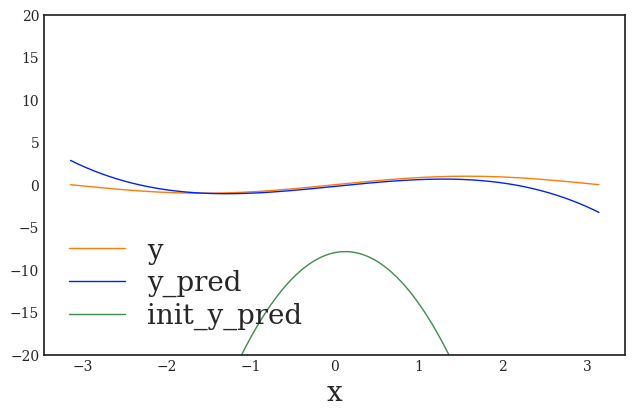

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

def plot_figure(x, y, y_pred, old_y_pred):

    # figure configuration
    plt.style.use('seaborn-white')
    matplotlib.rcParams['figure.figsize'] = [7.5, 4.5]
    matplotlib.rcParams['font.family'] = "serif"
    # matplotlib.rcParams['font.serif'] = 'Times'
    matplotlib.rcParams["figure.dpi"] = 100
    matplotlib.rcParams['savefig.dpi'] = 200
    linewidth = 1

    # make a canvas
    fig, ax = plt.subplots()
    

    # draw lines

    # orange
    ax.plot(x, y, color='#fb7d07', label='y', linewidth=linewidth)

    # blue
    ax.plot(x, y_pred , color='#0023F5', label='y_pred', linewidth=linewidth)

    # green
    ax.plot(x, old_y_pred, color='#3E8C4E', label='init_y_pred', linewidth=linewidth)

    # Set labels
    plt.xlabel('x', fontsize=20)
    # Set legend
    ax.legend(loc=3, prop={'size': 20}, labelspacing=0.2)
    y_limit = 20.0
    plt.ylim(-y_limit, y_limit)

    plt.show()

plot_figure(x, y, y_pred, init_y_pred)

